## Name: Kore Aishwarya Dhananjay
## Roll No. 2447014
## Class: BE(AI&DS)


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data = pd.read_csv('car_evaluation.csv', names=column_names)

In [3]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
print(data.isnull().sum())

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB
None


In [6]:
data['doors'].unique()

array(['2', '3', '4', '5more'], dtype=object)

In [7]:
data['doors'] = data['doors'].str.replace(r'\s*more', '', regex=True)

In [8]:
data['persons'].unique()

array(['2', '4', 'more'], dtype=object)

In [10]:
data['persons']=data['persons'].str.replace('more','5').astype('int')

In [11]:
data['persons'].unique()

array([2, 4, 5])

In [12]:
col=['buying','maint','lug_boot','safety','class']
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for i in col:
    data[i]=encoder.fit_transform(data[i])

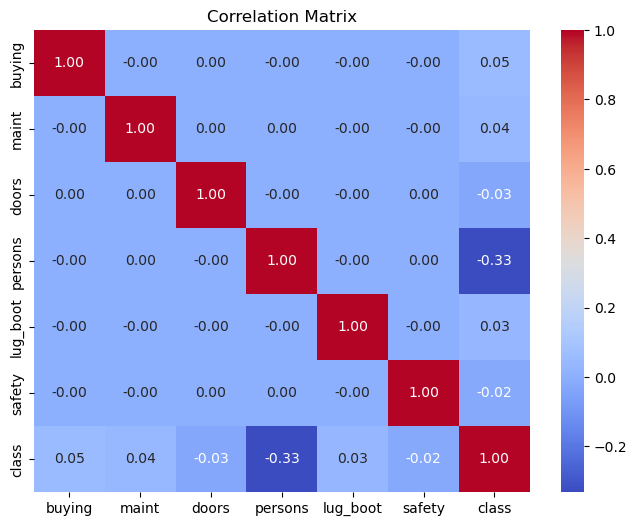

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


C:\Users\jadha\AppData\Local\Temp\ipykernel_4360\694360777.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=data, palette="pastel")


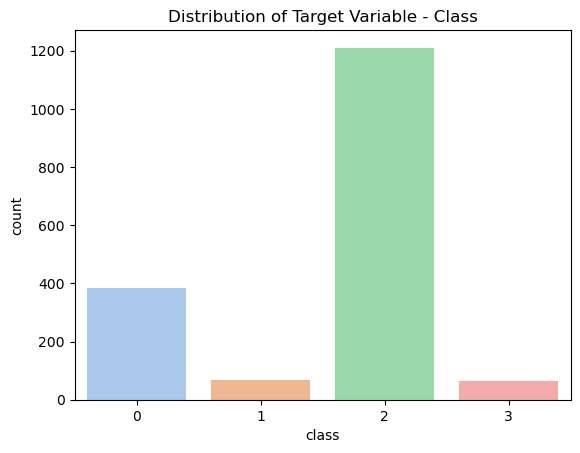

In [14]:
sns.countplot(x='class', data=data, palette="pastel")
plt.title("Distribution of Target Variable - Class")
plt.show()

In [15]:
x = data.drop('class', axis=1)
y = data['class']

In [16]:
print(x.shape)
print(y.shape,y.value_counts())

(1728, 6)
(1728,) class
2    1210
0     384
1      69
3      65
Name: count, dtype: int64


In [17]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x,y=smote.fit_resample(x,y)

In [18]:
print(x.shape)
print(y.shape,y.value_counts())

(4840, 6)
(4840,) class
2    1210
0    1210
3    1210
1    1210
Name: count, dtype: int64


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       236
           1       0.99      1.00      1.00       227
           2       1.00      0.99      0.99       267
           3       1.00      1.00      1.00       238

    accuracy                           0.99       968
   macro avg       0.99      1.00      0.99       968
weighted avg       0.99      0.99      0.99       968



In [23]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[235   1   0   0]
 [  0 227   0   0]
 [  3   1 263   0]
 [  0   0   0 238]]


<Axes: >

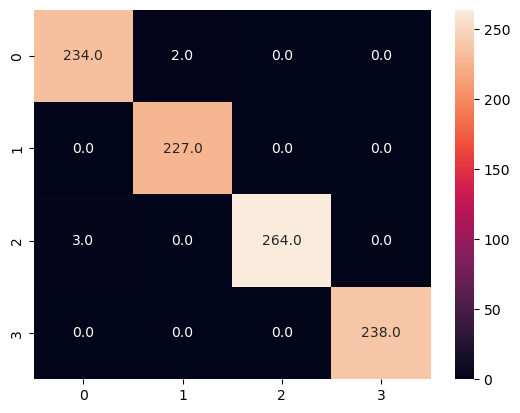

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt='0.1f')